<a href="https://colab.research.google.com/github/Ahmad-Nedal/Training-TH2-projs/blob/main/last_RF%20with%20ElasticNetCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# STRATIFIES K-FOLD CROSS VALIDATION
%matplotlib inline
import numpy as num
import pandas as pd
from google.colab import drive
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
from google.colab import drive
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plot
from sklearn.linear_model import ElasticNetCV

In [2]:
# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/thesis2/606_Full.csv", index_col=0, parse_dates=True)  
df = pd.read_csv('https://raw.githubusercontent.com/Ahmad-Nedal/TH2/main/DTI-606.csv')
x = df.iloc[:, 4:]
y = df.iloc[:, 3]

In [3]:
X=x.columns

In [4]:
x = df.iloc[:, 4:].values
y = df.iloc[:, 3].values

In [5]:
labels, counts = num.unique(y, return_counts=True)
print(labels, counts)

[1 2 3] [181 296 129]


In [6]:
#Encoding Categorical Data
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

##Model Building

In [7]:
# Create classifier object.
rf = RandomForestClassifier(n_jobs=-1,random_state=0,n_estimators=40, class_weight= 'balanced')

In [8]:
# Create StratifiedKFold object.

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)
Imputer = SimpleImputer(missing_values=num.nan, strategy='mean')
StSc = StandardScaler()

lst_accu_stratified = []
predicted_targets = num.array([])
actual_targets = num.array([])

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x[train_index], x[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]

	x_train_imputed = Imputer.fit_transform(x_train_fold)
	x_train_scaled = StSc.fit_transform(x_train_imputed)

	x_test_imputed = Imputer.transform(x_test_fold)
	x_test_scaled = StSc.transform(x_test_imputed)
 	##
	classifiers=rf.fit(x_train_scaled, y_train_fold)
	predicted_labels = classifiers.predict(x_test_scaled)
	predicted_targets = num.append(predicted_targets, predicted_labels)
	actual_targets = num.append(actual_targets, y_test_fold)
 
	#balanced_accuracy_score(y_true, y_pred)
	lst_accu_stratified.append(balanced_accuracy_score(predicted_targets, actual_targets))

## Model evaluation

In [9]:
#balanced_accuracy_score(y_true, y_pred)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


List of possible accuracy: [0.7550545714796922, 0.7700530645174707, 0.7635690235690236, 0.7663028451953999, 0.7493142212013143]

Maximum Accuracy That can be obtained from this model is: 77.00530645174707 %

Minimum Accuracy: 74.93142212013143 %

Overall Accuracy: 76.08587451925801 %

Standard Deviation is: 0.008492405552033924


Normalized confusion matrix


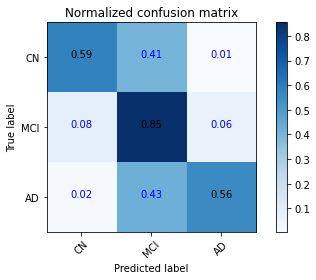

In [10]:
classnames = num.array(['CN', 'MCI', 'AD'], dtype='<U10')
def plot_confusion_matrix(predicted_labels_list, y_test_list):
    cnf_matrix = confusion_matrix(y_test_list, predicted_labels_list)
    num.set_printoptions(precision=2)

   
    plot.figure()
    generate_confusion_matrix(cnf_matrix, classes=classnames, normalize=True, title='Normalized confusion matrix')
    plot.show()
def generate_confusion_matrix(cnf_matrix, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cnf_matrix = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, num.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plot.imshow(cnf_matrix, interpolation='nearest', cmap=plot.get_cmap('Blues'))
    plot.title(title)
    plot.colorbar()

    tick_marks = num.arange(len(classes))
    plot.xticks(tick_marks, classes, rotation=45)
    plot.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cnf_matrix.max() / 2.


    for i in range (cnf_matrix.shape[0]):
        for j in range (cnf_matrix.shape[1]):
          plot.text(j, i, format(cnf_matrix[i, j], fmt), horizontalalignment="center",
                    color="black" if cnf_matrix[i, j] > thresh else "blue")
          plot.tight_layout()
          plot.ylabel('True label')
          plot.xlabel('Predicted label')

    return cnf_matrix
plot_confusion_matrix(predicted_targets, actual_targets)

## Features selection and importance

In [11]:
regr = ElasticNetCV(cv=5, random_state=0)
regr.fit(x, y)
ElasticNetCV(cv=5, random_state=0)

print(regr.alpha_)
print(regr.intercept_)

0.0013164468729625638
2.5585732184034087


In [12]:
importances = rf.feature_importances_

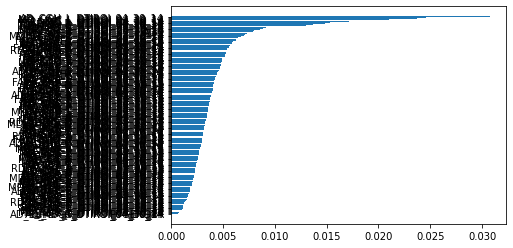

In [13]:
indices = num.argsort(importances)

fig, ax = plot.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(num.array(X)[indices])

In [14]:
# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importances.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(X[index], (importances[index] * 100.0)))

PTGENDER - 0.06%
AD_ICP_R_DTIROI_04_30_14 - 0.08%
AD_SUMBCC_DTIROI_04_30_14 - 0.09%
MD_ICP_L_DTIROI_04_30_14 - 0.10%
MD_RLIC_L_DTIROI_04_30_14 - 0.11%
MD_SCR_L_DTIROI_04_30_14 - 0.11%
RD_BCC_L_DTIROI_04_30_14 - 0.11%
RD_EC_R_DTIROI_04_30_14 - 0.11%
FA_ML_L_DTIROI_04_30_14 - 0.12%
AD_TAP_R_DTIROI_04_30_14 - 0.12%
RD_PLIC_L_DTIROI_04_30_14 - 0.13%
MD_CP_L_DTIROI_04_30_14 - 0.13%
FA_IFO_R_DTIROI_04_30_14 - 0.13%
RD_SUMCC_DTIROI_04_30_14 - 0.13%
AD_PLIC_R_DTIROI_04_30_14 - 0.13%
RD_SUMBCC_DTIROI_04_30_14 - 0.15%
RD_SCR_R_DTIROI_04_30_14 - 0.15%
RD_PTR_R_DTIROI_04_30_14 - 0.15%
RD_CP_R_DTIROI_04_30_14 - 0.15%
FA_SCC_L_DTIROI_04_30_14 - 0.16%
RD_SCC_R_DTIROI_04_30_14 - 0.16%
MD_CST_R_DTIROI_04_30_14 - 0.16%
AD_SCC_L_DTIROI_04_30_14 - 0.17%
AD_CGC_L_DTIROI_04_30_14 - 0.17%
FA_SUMCC_DTIROI_04_30_14 - 0.17%
FA_SS_L_DTIROI_04_30_14 - 0.18%
RD_GCC_R_DTIROI_04_30_14 - 0.18%
RD_GCC_L_DTIROI_04_30_14 - 0.18%
AD_SUMSCC_DTIROI_04_30_14 - 0.18%
AD_BCC_L_DTIROI_04_30_14 - 0.18%
MD_ICP_R_DTIROI_04_30_14 